#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Полезные-ссылки:" data-toc-modified-id="Полезные-ссылки:-0.0.1"><span class="toc-item-num">0.0.1&nbsp;&nbsp;</span><font color="orange">Полезные ссылки:</font></a></span></li></ul></li><li><span><a href="#Общее-впечатление" data-toc-modified-id="Общее-впечатление-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span><font color="orange">Общее впечатление</font></a></span></li><li><span><a href="#Общее-впечатление-(ревью-2)" data-toc-modified-id="Общее-впечатление-(ревью-2)-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span><font color="orange">Общее впечатление (ревью 2)</font></a></span></li><li><span><a href="#Общее-впечатление-(ревью-3)" data-toc-modified-id="Общее-впечатление-(ревью-3)-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span><font color="orange">Общее впечатление (ревью 3)</font></a></span></li><li><span><a href="#Общее-впечатление-(ревью-4)" data-toc-modified-id="Общее-впечатление-(ревью-4)-0.4"><span class="toc-item-num">0.4&nbsp;&nbsp;</span><font color="orange">Общее впечатление (ревью 4)</font></a></span></li></ul></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Перейдем-к-обучению-моделей" data-toc-modified-id="Перейдем-к-обучению-моделей-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Перейдем к обучению моделей</a></span><ul class="toc-item"><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li><li><span><a href="#LGBMRegressor" data-toc-modified-id="LGBMRegressor-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>LGBMRegressor</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import time

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from lightgbm import LGBMRegressor
import lightgbm as lgb
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor, Pool

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import TimeSeriesSplit
from scipy.stats import randint as sp_randint

In [2]:
# Информация о df

def data_info(df):
    print('Первые 10 записей')
    display(df.head(10))
    print()
    print('-' * 70)
    print()
    print('Последние 10 записей')
    display(df.tail(10))
    print()
    print('-' * 70)
    print()
    print("Обащая информация")
    display(df.info())
    print()
    print('-' * 70)
    print()
    display(data.describe().T)

In [3]:
# Функция построения данных после декомпозиции 

def decomposed_time(result):
    if result == 'trend':
        a = decomposed.trend
        a.plot(figsize=(20, 5))
        plt.ylabel('Тренд')
        plt.show()
    elif result == 'seasonal':
        a = decomposed.seasonal
        a.plot(figsize=(20, 5))
        plt.ylabel('Сезонная составляющая')
        plt.show()
    elif result == 'resid':
        a = decomposed.resid
        a.plot(figsize=(20, 5))
        plt.ylabel('Остаток декомпозиции')
        plt.show()

## Подготовка

In [4]:
data = pd.read_csv('/datasets/taxi.csv',
                   index_col=0,
                   parse_dates=True)

In [5]:
data_info(data)

Первые 10 записей


,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
2018-03-01 00:50:00,21
2018-03-01 01:00:00,7
2018-03-01 01:10:00,5
2018-03-01 01:20:00,17



----------------------------------------------------------------------

Последние 10 записей


,num_orders
datetime,
2018-08-31 22:20:00,48
2018-08-31 22:30:00,41
2018-08-31 22:40:00,34
2018-08-31 22:50:00,34
2018-08-31 23:00:00,30
2018-08-31 23:10:00,32
2018-08-31 23:20:00,24
2018-08-31 23:30:00,27
2018-08-31 23:40:00,39



----------------------------------------------------------------------

Обащая информация
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


None


----------------------------------------------------------------------



,count,mean,std,min,25%,50%,75%,max
num_orders,26496.0,14.070463,9.21133,0.0,8.0,13.0,19.0,119.0


In [6]:
# Ресемплируем данные по часу и применяем агрегирующую функцию сумма

data = data.resample('1H').sum()

In [7]:
data_info(data)

Первые 10 записей


,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
2018-03-01 05:00:00,6
2018-03-01 06:00:00,12
2018-03-01 07:00:00,15
2018-03-01 08:00:00,34



----------------------------------------------------------------------

Последние 10 записей


,num_orders
datetime,
2018-08-31 14:00:00,133
2018-08-31 15:00:00,116
2018-08-31 16:00:00,197
2018-08-31 17:00:00,217
2018-08-31 18:00:00,207
2018-08-31 19:00:00,136
2018-08-31 20:00:00,154
2018-08-31 21:00:00,159
2018-08-31 22:00:00,223



----------------------------------------------------------------------

Обащая информация
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


None


----------------------------------------------------------------------



,count,mean,std,min,25%,50%,75%,max
num_orders,4416.0,84.422781,45.023853,0.0,54.0,78.0,107.0,462.0


In [8]:
# Проверка монотонности данных

data.sort_indexhascending=True
data.index.is_monotonic

True

**Промежуточный вывод:**

Был загружен датафрейм с данными о количестве заказов такси в зависимости от даты и времени. Я перевела тип данных с датами в datetime. Количество заказов имеет тип int - это нам подходит. Пропусков в данных нет. После ресемплирования по часу я получила данные, где миникальное число заказов за час было ноль, а максимальное доходит до 462, всреднем 84 заказа в час. Также данные расположены в хронологическом порядке.

## Анализ

In [9]:
# Проведем декомпозицию данных, разбив их на тренд, сезонности и остаток с марта по апрель 2018

decomposed = seasonal_decompose(data['num_orders'])

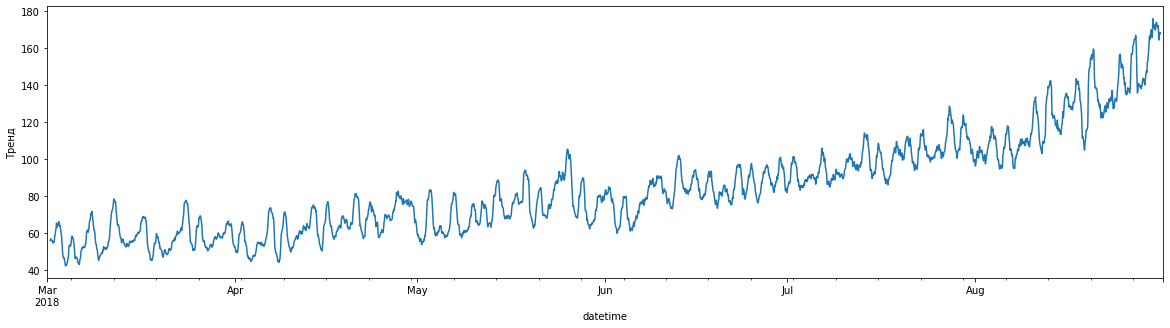

In [10]:
# Визуализация тренда

decomposed_time('trend')

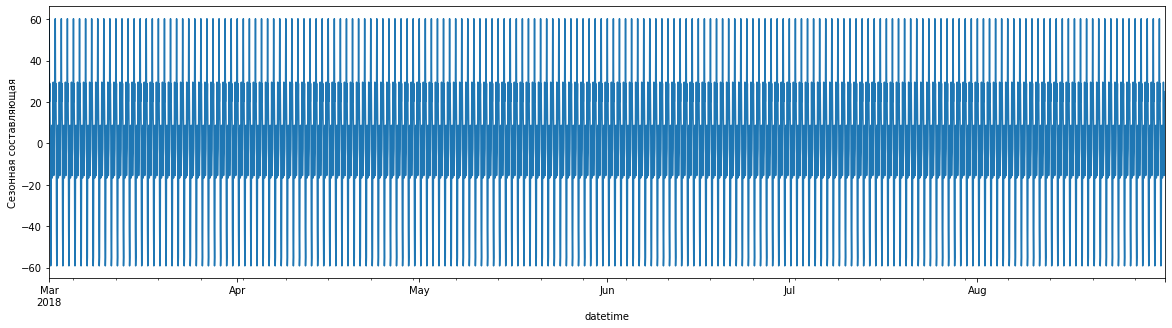

In [11]:
# Визуализация сезонности

decomposed_time('seasonal')

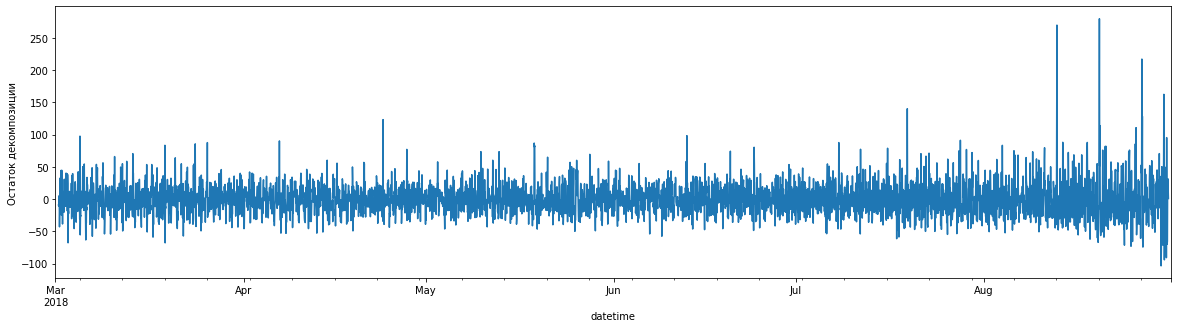

In [12]:
# Визуализация остатка

decomposed_time('resid')

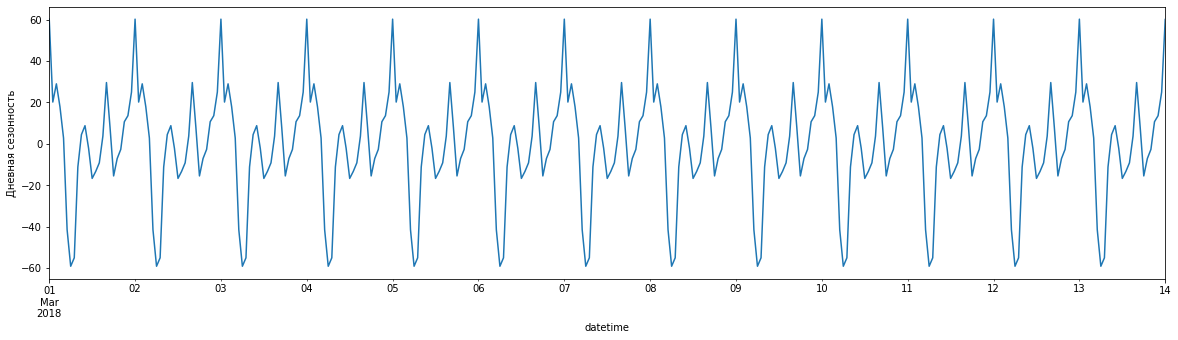

In [13]:
# Дополнительные графики для сезонности

seasonal = decomposed.seasonal

# Срез 2 недель, с 1 марта по 14 2018 года 

start_day = '2018-03-01'
end_day = '2018-03-14'
seasonal.plot(figsize=(20,5), xlim=(start_day, end_day))
plt.ylabel('Дневная сезонность')
plt.show()

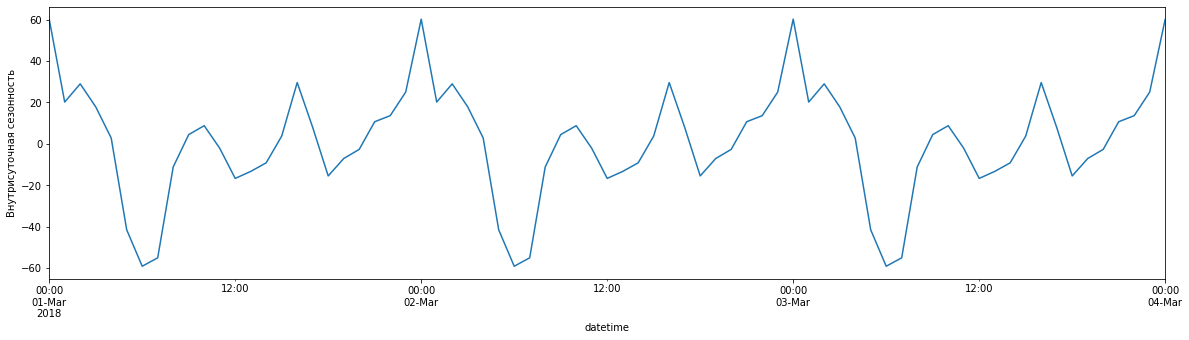

In [14]:
# Срез 4 дней, с 1 по 4 марта

start_hour = '2018-03-01'
end_hour = '2018-03-04'
seasonal.plot(figsize=(20,5), xlim=(start_hour, end_hour))
plt.ylabel('Внутрисуточная сезонность')
plt.show()

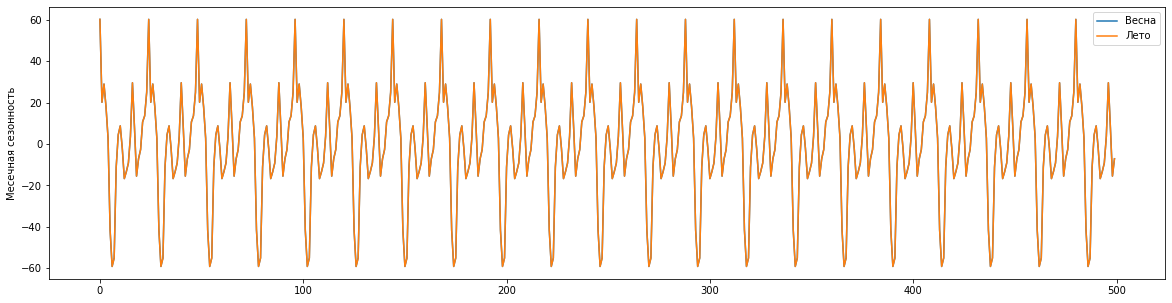

In [15]:
# Сравнение срезов марта и августа 2018

first_seasonal = seasonal[:'2018-03']
second_seasonal = seasonal['2018-08':]
pd.DataFrame({
    'Весна': first_seasonal.values[:500],
    'Лето': second_seasonal.values[:500]
}).plot(figsize=(20,5))
plt.ylabel('Месечная сезонность')
plt.show()

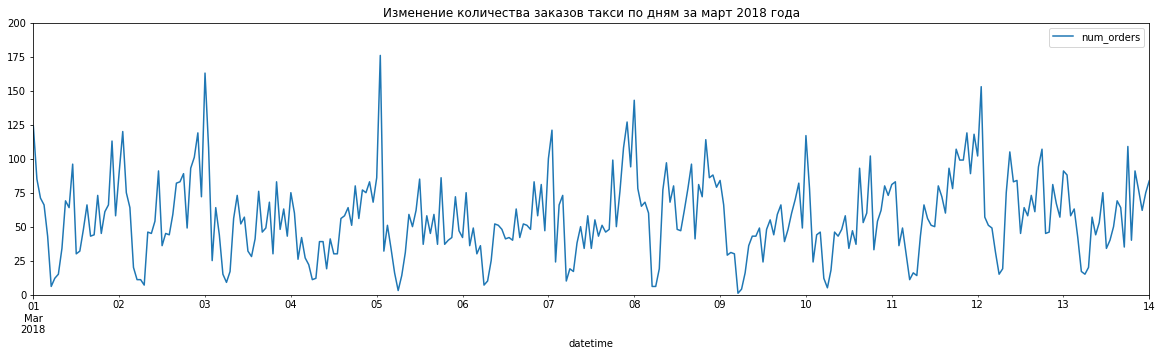

In [16]:
data.plot(figsize=(20, 5),
          xlim=(start_day, 
                end_day),
          ylim=(0, 200))
plt.title('Изменение количества заказов такси по дням за март 2018 года')
plt.show()

**Промежуточный вывод:**

График тренда является нестационарным, так как меняется среднее значение, то есть мы имеет растущую тенденцию заказов. 

Для сезонности построим дополнительные графики по следующим срезам: 

1. Две первые недели марта - есть закономерность среди дней;
2. Внутрисуточная сезонность, первые 4 дня марта - пик заказов в полночь и минимум наблюдается ранним утром;
3. Сравнение марта и августа показала, что месячная сезонность не наблюдается, графики идентичны.

На основании того, что имеется восходящий тренд и отсутствует месячная сезонность, можно говорить о росте компании, так как тренд не имеет существенных паданий и наблюдается планомерный рост среднего количества заказов от месяца к месяцу

## Обучение

In [17]:
# Функция создания дополнительных признаков
# max_lag - максимальная задержка
# rolling_mean_size - размер окна для скользящего среднего

def make_features(data, max_lag, rolling_mean_size, goal='num_orders'):
    
    data['dayofweek'] = data.index.dayofweek # признак, в котором хранится день недели как число
    data['hour'] = data.index.hour # признак, в котором хранится час как число
    
    for lag in range(1, max_lag + 1): # создание лаговых признаков и сдвиг данных
        data['lag_{}'.format(lag)] = data[goal].shift(lag)

    data['rolling_mean'] = data[goal].shift().rolling(rolling_mean_size).mean()

In [18]:
temp = data.copy()
make_features(temp, 25, 5)

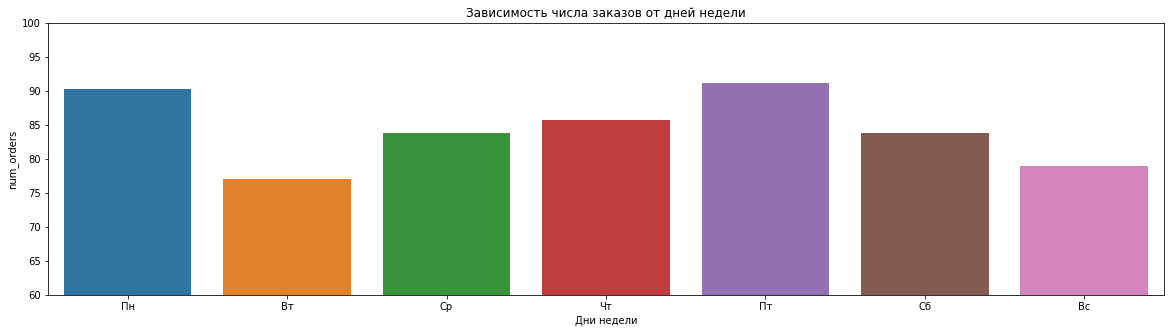

In [19]:
# Визуализируем среднее количество заказов в зависимости от дня недели

day_pivot = temp.pivot_table(index=['dayofweek'],
                              values='num_orders',
                              aggfunc='mean')

plt.figure(figsize=(20, 5))
sns.barplot(x='dayofweek', 
            y='num_orders',
            data=day_pivot.reset_index())

# Задаем собственные метки для оси X
days_labels = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']
plt.xticks(ticks=range(len(days_labels)), 
           labels=days_labels)

plt.title('Зависимость числа заказов от дней недели')
plt.ylim(60, 100)
plt.xlabel('Дни недели')  
plt.show()

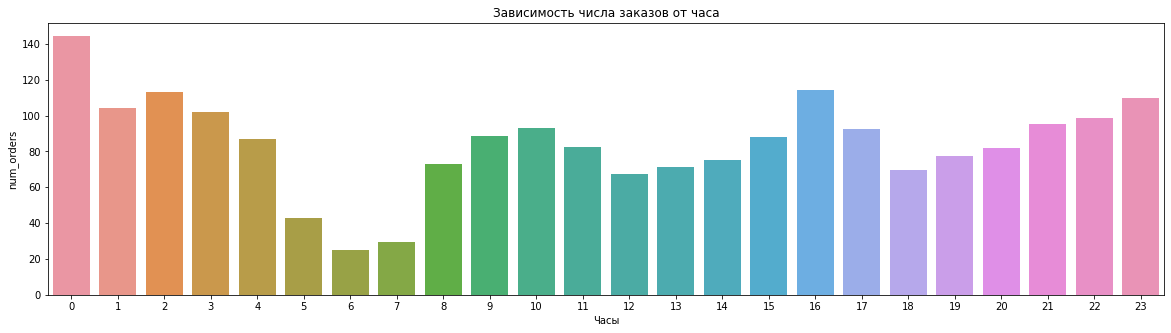

In [20]:
hour_pivot = temp.pivot_table(index=['hour'],
                              values='num_orders',
                              aggfunc='mean')

plt.figure(figsize=(20, 5))
sns.barplot(x='hour', 
            y='num_orders',
            data=hour_pivot.reset_index())

plt.title('Зависимость числа заказов от часа')
plt.xlabel('Часы')
plt.show()

**Промежуточный вывод:**

Я написала функцию для создания признаков, таких как день недели и час. Далее визуализировала зависимость числа заказов от дня недели - это показало нам, что во вторник наименьший спрос, а по пятницам он максимален. На графике зависимости чискла заказов от часа видим следующую картину: утром (6-7 часов) строс минимальный, в полночь спрос максимальный.

### Перейдем к обучению моделей

In [21]:
train,test = train_test_split(temp,shuffle = False, random_state = 42, test_size = 0.1)
train = train.dropna()

In [22]:
train.shape

(3949, 29)

In [23]:
test.shape

(442, 29)

In [24]:
(train_features, test_features) = (train.drop('num_orders',axis = 1), test.drop('num_orders',axis = 1))
(train_target, test_target) = (train['num_orders'], test['num_orders'])

In [25]:
print(train_features.shape)
print(train_target.shape)

(3949, 28)
(3949,)


In [26]:
print(test_features.shape)
print(test_target.shape)

(442, 28)
(442,)


#### RandomForestRegressor

In [27]:
splits = TimeSeriesSplit(n_splits=3)

In [28]:
scorer = make_scorer(mean_squared_error, squared=False)

In [29]:
RF = RandomForestRegressor(random_state=42)
parametrs = {"max_depth": [1,10],"n_estimators":[100,150,10]}

RF_grid = GridSearchCV(RF, parametrs, cv=splits, scoring=scorer, verbose=True, n_jobs=-1)

In [30]:
RF_grid.fit(train_features,train_target)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
             estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 10], 'n_estimators': [100, 150, 10]},
             scoring=make_scorer(mean_squared_error, squared=False),
             verbose=True)

In [31]:
best_score_RF = RF_grid.best_score_
print("Оценка на кросс-валидации:", best_score_RF)

Оценка на кросс-валидации: 36.562636033741796


#### LGBMRegressor

In [ ]:
param_dist = {"max_depth": sp_randint(5, 15),
              "learning_rate": [0.01, 0.05, 0.1, 0.2],
              "n_estimators": sp_randint(100, 1000)}

model_lgb = lgb.LGBMRegressor(metric='l2')

random_search_lgb = RandomizedSearchCV(model_lgb, param_distributions=param_dist, n_iter=10, scoring='neg_root_mean_squared_error')

random_search_lgb.fit(train_features, train_target)

In [ ]:
best_params_lgb = random_search_lgb.best_params_
print("Лучшие параметры:", best_params_lgb)

best_score_lgb = random_search_lgb.best_score_
print("Оценка на кросс-валидации:", abs(best_score_lgb))

#### CatBoostRegressor

In [ ]:
catboost = CatBoostRegressor(loss_function='RMSE',random_state = 42)
parameters_cat = {'depth':[5,10], 'learning_rate':np.arange(0.1,1,0.2)}
catboost_grid = GridSearchCV(catboost, parameters_cat, cv=splits, verbose=True, scoring='neg_root_mean_squared_error')
catboost_grid.fit(train_features, train_target)

In [ ]:
best_score_cat = catboost_grid.best_score_
print("Оценка на кросс-валидации:", -best_score_cat)

## Тестирование

In [ ]:
predictions = random_search_lgb.best_estimator_.predict(test_features)

In [ ]:
rmse = np.sqrt(mean_squared_error(test_target, predictions))
print("RMSE модели LightGBM на тестовой выборке", rmse)

**Вывод:**


*RandomForestRegressor:*

Оценка (RMSE) на кросс-валидации: 36.562636033741796


LGBMRegressor:*

Оценка (RMSE) на кросс-валидации: 23.197833575228817


LGBMRegressor показывает гораздо лучшую точность по сравнению с RandomForestRegressor.

*CatBoostRegressor:*

Оценка (RMSE) на кросс-валидации: 29.32398383572114


На тестовой выборке мы проверили модель LightGBM и получили метрику 48.536839318476694